In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
import sys
import getpass
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


In [7]:
def scatter(x, labels, title, subtitle=None):
    palette = np.array(sns.color_palette("hls", 4))
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0,alpha = 0.5, s=40, c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    plt.title(title)

In [8]:
X, Y = make_classification(n_samples=200, n_features=10, n_informative=3,
                           n_classes=4, n_clusters_per_class=1, random_state=0)

X.shape, Y.shape

((200, 10), (200,))

(200, 2) (200,)


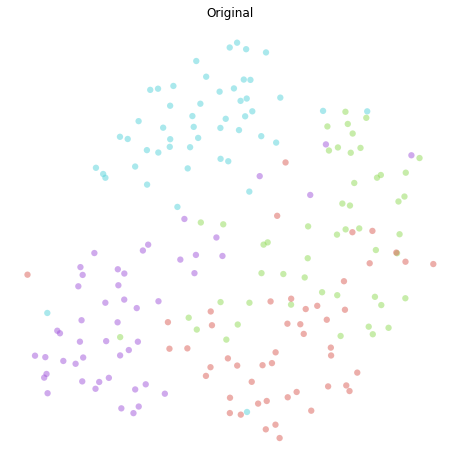

In [9]:
tsne = TSNE()
X_orig = tsne.fit_transform(X)
print(X_orig.shape, Y.shape)
scatter(X_orig, Y, 'Original')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((160, 10), (160,), (40, 10), (40,))

In [12]:
train = pd.concat([
    pd.DataFrame(X_train, columns=[f"feature_{i}" for i in range(10)]), 
    pd.DataFrame(y_train, columns=['target'])
                 ], axis=1)

test = pd.concat([
    pd.DataFrame(X_test, columns=[f"feature_{i}" for i in range(10)]), 
    pd.DataFrame(y_test, columns=['target'])
                 ], axis=1)

In [13]:
train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,0.589173,-1.770896,-1.214621,0.397394,1.042208,-0.045084,-0.794652,1.038973,-0.218012,-1.368808,1
1,0.119697,2.035277,1.595192,-0.465020,0.636339,-0.505013,0.499611,0.497313,0.386101,0.640797,0
2,0.329686,-2.581175,-1.545053,-0.655998,-1.692722,0.369297,0.825998,0.691713,0.012872,-1.330849,2
3,-1.199747,2.735830,1.655346,-1.346731,2.429695,-0.019298,-1.131430,0.949620,0.139899,1.174063,0
4,2.061899,-0.651116,-0.748604,-0.511390,0.246547,-0.061211,-0.891430,-0.900838,-1.892781,0.050509,1
...,...,...,...,...,...,...,...,...,...,...,...
155,0.442926,-1.761050,-0.943685,0.939299,0.315431,1.388474,0.123846,-2.171237,0.774325,-1.572330,2
156,-0.075177,2.649211,1.633171,-0.042743,1.909642,0.499166,-0.823715,1.132741,0.860162,1.229976,0
157,-0.617505,-0.066476,0.410898,0.875093,-1.701618,-0.346702,1.779230,0.711366,-0.687565,-0.255288,2
158,0.429767,2.287592,0.931187,-0.653127,3.099837,1.189917,-2.435372,0.624507,-0.682962,1.398291,0


In [14]:
train.to_csv('train.csv')
test.to_csv('test.csv')